In [10]:
 import pandas as pd
 import numpy as np


### Flight Data 
The US department of Transportation, Beueau of Transportaion Statistics publishes on-time flight information for US Airports.    https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time

Flight data is captured from Janurary 2014 to Sept 2019

- 'FL_DATE' 		FlightDate
- 'OP_CARRIER',		ATA_CODE_Reporting_Airline
- 'OP_CARRIER_FL_NUM',Flight_Number_Reporting_Airline
- 'ORIGIN',			Origin
- 'DEST',			DestAirportID
- 'DEP_DELAY',		DepDelay
- 'ARR_DELAY',		ArrDelay
- 'CANCELLED',		Cancelled
- 'DISTANCE',		Distance
- 'CARRIER_DELAY',	CarrierDelay
- 'WEATHER_DELAY',	WeatherDelay
- 'NAS_DELAY',		NASDelay
- 'SECURITY_DELAY', SecurityDelay
- 'LATE_AIRCRAFT_DELAY',LateAircraftDelay

{% raw %}
<div style="width:250px; height:auto; float:left; display:inline"><b>'FL_DATE'</b>:</div> 
<div>FlightDate</div>
{% endraw %}


In [13]:
data = pd.read_csv('./data/985570288_T_ONTIME_REPORTING.csv')
data = data.fillna(np.nan)

In [14]:
data.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 14'],
      dtype='object')

In [15]:
data.sort_values(by='ARR_DELAY',ascending=False)[:5]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 14
85404,2019-01-05,AA,2363,FAT,DFW,1651.0,1638.0,0.0,1313.0,1638.0,0.0,0.0,0.0,0.0,NaN
452909,2019-01-25,AA,511,BUF,DFW,1637.0,1609.0,0.0,1212.0,960.0,118.0,0.0,0.0,531.0,NaN
355264,2019-01-19,AA,335,ORD,MIA,1566.0,1556.0,0.0,1197.0,24.0,18.0,0.0,0.0,1514.0,NaN
294548,2019-01-16,AA,1586,GSP,DFW,1500.0,1508.0,0.0,862.0,1500.0,0.0,8.0,0.0,0.0,NaN
373872,2019-01-20,YV,5843,BMI,DFW,1487.0,1495.0,0.0,690.0,1487.0,0.0,8.0,0.0,0.0,NaN


#### Flights Delayed more than 20 min

In [16]:
data['delayed'] = data['ARR_DELAY'].apply(lambda x: x > 20)
data['delayed'].value_counts()

False    498135
True      85850
Name: delayed, dtype: int64

#### Determination percentage of flights delayed more tha 20 min

In [7]:
def printC(answer):
    print ('\nPercentage of all delayed flights {:0.2f}ºC.\n'.format(answer))

Using str.format()'s syntax to display answer with two decimal places (without altering the underlying value of answer):
Where:

- : introduces the format spec
- 0 enables sign-aware zero-padding for numeric types
- .2 sets the precision to 2
- f displays the number as a fixed-point number


In [8]:
not_delayed = data['delayed'].value_counts()[0] # first value of the result above
delayed = data['delayed'].value_counts()[1]     # second value of the result above
total_flights = not_delayed + delayed           # total count of flights

percent = round(100*(delayed) / total_flights,2)# converting to float to get a float result

printC(percent)


Percentage of all delayed flights 12.65ºC.



In [9]:
group_by_carrier = data.groupby(['OP_CARRIER','delayed'])
#group_by_carrier.size()
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')


In [10]:
flt_by_carrier = data.pivot_table(index='FL_DATE',
                                  columns='OP_CARRIER',
                                  values='OP_CARRIER_FL_NUM',
                                  aggfunc='count')
                                  
flt_by_carrier.head()

OP_CARRIER,AA,AS,B6,DL,EV,F9,HA,NK,OO,UA,VX,WN
FL_DATE,,,,,,,,,,,,
2016-01-01,2414,463,787,1709,1156,240,215,359,1396,1328,171,2781
2016-01-02,2390,457,757,2202,1510,269,203,357,1662,1338,184,3540
2016-01-03,2641,482,784,2384,1594,268,205,356,1693,1487,197,3787
2016-01-04,2630,467,789,2265,1525,271,206,357,1646,1574,194,3646
2016-01-05,2375,444,742,2257,1391,227,198,355,1525,1311,183,3574


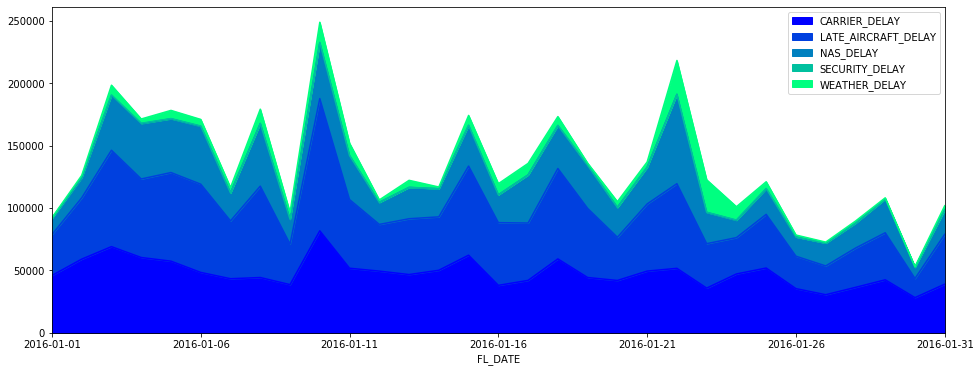

In [11]:
delays_list = ["CARRIER_DELAY",
                "WEATHER_DELAY",
                "NAS_DELAY",
                "SECURITY_DELAY",
                "LATE_AIRCRAFT_DELAY"]
flight_delays_by_day = data.pivot_table(index='FL_DATE', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='winter') # area plot

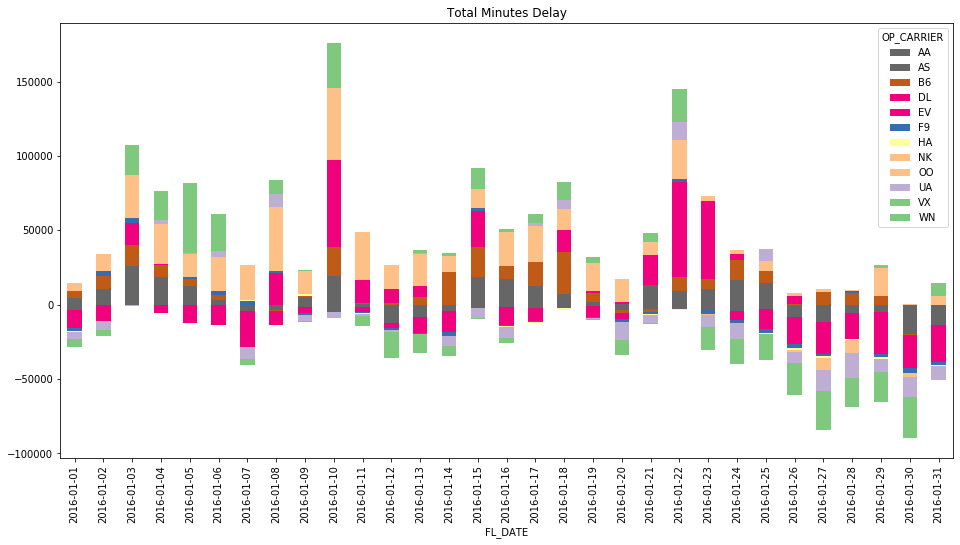

In [12]:
delay_by_day_carrier = data.pivot_table(index='FL_DATE', columns='OP_CARRIER', values='ARR_DELAY', aggfunc='sum')
delay_by_day_carrier.plot(kind='bar', figsize=[16,8], stacked=True, colormap='Accent_r', title='Total Minutes Delay')

In [13]:
southwest = data[data['OP_CARRIER'] == 'WN']['ARR_DELAY']
southwest.describe()

count    101335.000000
mean         -0.446628
std          26.766462
min         -66.000000
25%         -13.000000
50%          -6.000000
75%           4.000000
max         640.000000
Name: ARR_DELAY, dtype: float64

In [14]:
virgin = data[data['OP_CARRIER'] == 'VX']['ARR_DELAY']
virgin.describe()

count    5218.000000
mean        7.615753
std        41.354410
min       -79.000000
25%       -13.000000
50%        -3.000000
75%        12.000000
max       381.000000
Name: ARR_DELAY, dtype: float64

OP_CARRIER
VX    AxesSubplot(0.125,0.125;0.775x0.755)
WN    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ARR_DELAY, dtype: object

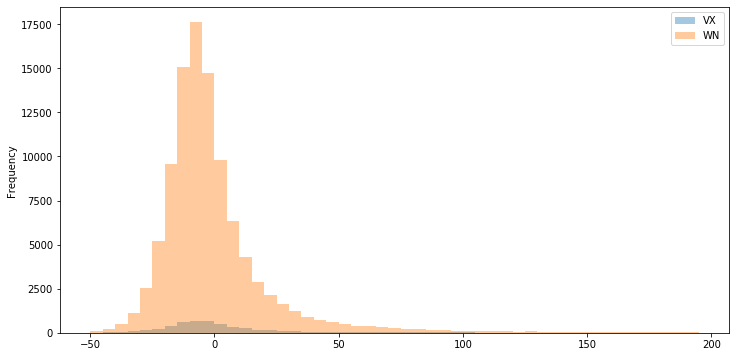

In [16]:
#bin_values = np.arange(start=-50, stop=200, step=10)
#vx_carrier = data[data['OP_CARRIER'] == 'WN']
#vx_carrier['ARR_DELAY'].hist(bins=bin_values, figsize=[14,6])

bin_values = np.arange(start=-50, stop=200, step=5)
us_mq_airlines_index = data['OP_CARRIER'].isin(['WN','VX']) # create index of flights from those airlines
us_mq_airlines = data[us_mq_airlines_index] # select rows
group_carriers = us_mq_airlines.groupby('OP_CARRIER')['ARR_DELAY'] # group values by carrier, select minutes delayed
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True) # alpha for transparency
  

['ATL', 'ORD', 'DEN', 'DFW', 'LAX', 'SFO', 'PHX', 'LAS', 'IAH', 'MCO', 'SEA', 'MSP', 'DTW', 'CLT', 'BOS', 'SLC', 'EWR', 'LGA', 'JFK', 'FLL']


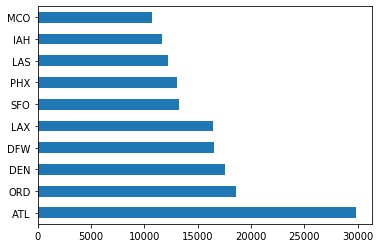

In [27]:
hi_volume = data['ORIGIN'].value_counts()[:20]
hi_volume_airports_names = hi_volume.index.tolist()
print (hi_volume_airports_names)
hi_volume_airports = data[data['ORIGIN'].isin(hi_volume_airports_names)]
hi_volume_airports.head()
data['ORIGIN'].value_counts()[:10].plot(kind='barh')

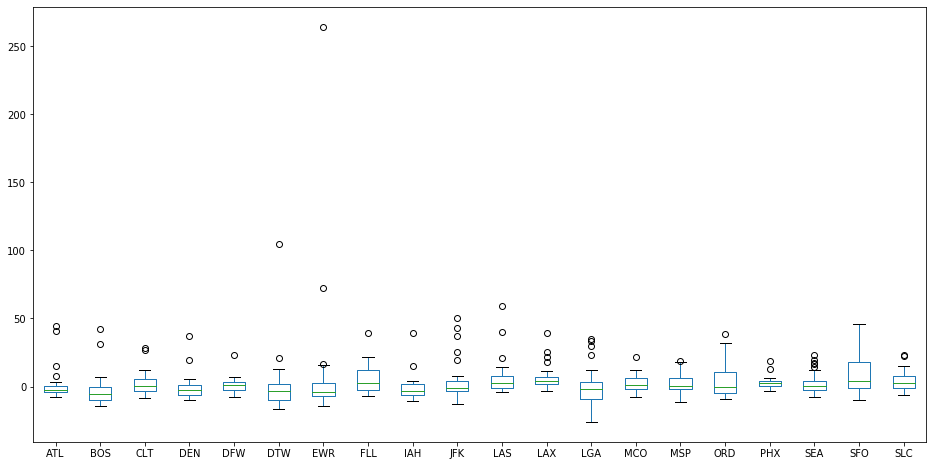

In [28]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='FL_DATE', columns='ORIGIN', values='ARR_DELAY')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])
    